Classification + Regression<br>

Input File: 'data_clean.csv' <br>

Output File 1: 'classification_result_approach3.csv' for hyperparam tuning of classification models<br>
Output File 2: 'result_approach3.csv' for hyperparam tuning<br>
Output File 3: 'result_compare_approach3.csv' for best model (Not Neural Netwok) prediction comparion of each year<br>
Output File 4: 'result_compare_nn_approach3.csv'for best Neural Network model prediction comparion of each year<br>
Output File 5: 'namelist_approach3.csv' for predicted 2020 namelist (Not Neural Network)<br>
Output File 6: 'namelist_nn_approach3.csv' for predicted 2020 namelist (Neural Network)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [8]:
data = pd.read_csv('data_clean.csv',index_col = False)

In [9]:
#from the data description use award_share as y variable
year = 'season'
player = 'player'
num_col = ['vorp', 'fta', 'efg', 'stl', 'trb', 'blk', 'fg%', 'ft%', 'tov', 'g', 'ast', '3p%', 'fg3a', 'pf', 'mp', 'fga', 'age', 'experience', 'vorp_rt', 'vorp_sq', 'fta_rt', 'fta_sq', 'efg_rt', 'efg_sq', 'stl_rt', 'stl_sq', 'trb_rt', 'trb_sq', 'blk_rt', 'blk_sq', 'fg%_rt', 'fg%_sq', 'ft%_rt', 'ft%_sq', 'tov_rt', 'tov_sq', 'g_rt', 'g_sq', 'ast_rt', 'ast_sq', '3p%_rt', '3p%_sq', 'fg3a_rt', 'fg3a_sq', 'pf_rt', 'pf_sq', 'mp_rt', 'mp_sq', 'fga_rt', 'fga_sq', 'age_rt', 'age_sq', 'experience_rt', 'experience_sq']
dummy_col = ['pos_C', 'pos_PF', 'pos_PG', 'pos_SF', 'pos_SG',
             'team_ATL', 'team_BOS', 'team_BRK', 'team_CHA', 
             'team_CHH', 'team_CHI', 'team_CHO', 'team_CLE', 
             'team_DAL', 'team_DEN', 'team_DET', 'team_GSW', 
             'team_HOU', 'team_IND', 'team_KCK', 'team_LAC', 'team_LAL', 'team_MEM', 'team_MIA', 'team_MIL', 'team_MIN', 'team_NJN', 'team_NOH', 'team_NOP', 'team_NYK', 'team_OKC', 'team_ORL', 'team_PHI', 'team_PHO', 'team_POR', 'team_SAC', 'team_SAS', 'team_SEA', 'team_TOR', 'team_TOT', 'team_UTA', 'team_WAS', 'team_WSB']
X_col =  num_col.copy()
X_col.extend(dummy_col)
y_col =  'award_share'

classification

In [10]:
# 3 class classification
data['order'] = data[y_col]
data2 = pd.DataFrame()
for s in list(set(data['season_x'].values).difference(set([2020]))):
    data_temp = data[data['season_x'] == s]
    #use median as bar to distinguish little vote or zero vote
    bar_temp = np.median(data_temp[y_col])
    #first class: vote larger than median
    data_temp['order'][data_temp['order'] > bar_temp] = 1
    #third class: zero vote
    data_temp['order'][data_temp['order'] == 0] = 3
    #second class: vote smaller or equal to median but larger than 0
    data_temp['order'][(data_temp['order'] != 1) & (data_temp['order'] != 3)] = 2
    data2 = pd.concat([data2,data_temp])
    

data2['order'] = data2['order'].apply(int)
data2['order'].value_counts()

data = pd.concat([data2,data[data['season_x'] == 2020]])

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del

In [15]:
#param for classification
def get_LogisticRegression_param():
    param = []
    for C in [1000,10000,100000,1000000]:
        param.append({'C':C,'random_state':221})
    return param

def get_KNeighborsClassifier_param():
    param = []
    for n_neighbors in [3,5,7]:
        for weights in ['uniform','distance']:
            for p in [1,2]:
                param.append({'n_neighbors':n_neighbors,'weights':weights,'p':p})
    return param

def get_DecisionTreeClassifier_param():
    param = []
    for criterion in ['gini','entropy']:
        for max_depth in [40,50,60,70,80]:
            param.append({'criterion':criterion,'max_depth':max_depth,'random_state':221})
    return param

def get_RandomForestClassifier_param():
    param = []
    for n_estimators in [200,300]:
        for max_depth in [40,50,60,70,80]:
            param.append({'n_estimators': n_estimators,'max_depth': max_depth,'random_state':221})
    return param

def get_SVC_param():
    param = []
    for kernel in ['linear','rbf','sigmoid']:
        for C in [0.1,1,10]:
            param.append({'kernel':kernel,'C':C,'random_state':221})
    return param

def get_GradientBoostingClassifier_param():
    param = []
    for learning_rate in [0.01,0.1,1]:
        for n_estimators in [10,100]:
            param.append({'learning_rate':learning_rate,'n_estimators':n_estimators,'random_state':221})
    return param

def get_AdaBoostClassifier_param():
    param = []
    for learning_rate in [0.01,0.1,1]:
        for n_estimators in [10,100]:
            param.append({'learning_rate':learning_rate,'n_estimators':n_estimators,'random_state':221})
    return param

def get_XGBClassifier_param():
    param = []
    for n_estimators in [500]:
        for max_depth in [5,8]:
            for subsample in [0.6,0.8]:
                for colsample_bytree in [0.7]:
                    param.append({'n_estimators':n_estimators, 'max_depth':max_depth,'subsample':subsample,'colsample_bytree':colsample_bytree,'random_state':221})
    return param

def get_MLPClassifier_param():
    param = []
    for alpha in [1e-4,1e-5,1e-6]:
        for hidden_layer_sizes in [(100,),(200,),(300,)]:
            param.append({'alpha':alpha,'hidden_layer_sizes':hidden_layer_sizes,'random_state':221})
    return param


In [16]:
models = [LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,SVC,GradientBoostingClassifier,AdaBoostClassifier,XGBClassifier,MLPClassifier]
#models = [LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,MLPClassifier]
param = {
    LogisticRegression.__name__:get_LogisticRegression_param(),
    KNeighborsClassifier.__name__:get_KNeighborsClassifier_param(),
    DecisionTreeClassifier.__name__:get_DecisionTreeClassifier_param(),
    RandomForestClassifier.__name__:get_RandomForestClassifier_param(),
    SVC.__name__:get_SVC_param(),
    GradientBoostingClassifier.__name__:get_GradientBoostingClassifier_param(),
    AdaBoostClassifier.__name__:get_AdaBoostClassifier_param(),
    XGBClassifier.__name__:get_XGBClassifier_param(),
    MLPClassifier.__name__:get_MLPClassifier_param()
}

In [17]:
#first predict the order
result_c = pd.DataFrame(columns = ['model','param','acc','top','mvp'])
models = [LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,XGBClassifier]

k = 0
best_acc = 0
for m in models:
    for index,p in enumerate(param[m.__name__]):
        #store accuracy
        acc_list = []
        #store the rate of top 5 players in class 1 prediction
        score_list = []
        #store whether mvp in class 1 prediction
        mvp_list = []
        top_num = 5
        for s in list(set(data['season_x'].values).difference(set([2020]))):
            #train test split
            data_temp = data[data['season_x'] != 2020]
            X_train = data_temp[data_temp['season_x'] != s][X_col]
            y_train = data_temp[data_temp['season_x'] != s]['order']
            X_val = data_temp[data_temp['season_x'] == s][X_col]
            y_val = data_temp[data_temp['season_x'] == s]['order']
            y_target = data_temp[data_temp['season_x'] == s]['award_share']
            #predict
            order_model = m(**p)
            order_model.fit(X_train,y_train)
            y_prd = order_model.predict(X_val)
            #evaluation
            true_top_num = np.argsort(y_target.to_numpy())[::-1][:top_num].tolist()
            true_mvp = np.argsort(y_target.to_numpy())[::-1][:1]
            predicted_1 = np.argwhere(y_prd == 1).T[0].tolist()
            #score evaluation
            score = 0
            for i in true_top_num:
                if i in predicted_1:
                    score += 1/top_num
            score_list.append(score)
            #mvp evaluation
            mvp = 0
            for i in true_mvp:
                if i in predicted_1:
                    mvp = 1
            mvp_list.append(mvp)
            #acc evaluation
            acc = accuracy_score(y_val,y_prd)
            acc_list.append(acc)
                        
        result_c.loc[k] = [m.__name__,p,np.mean(acc_list),np.mean(score_list),np.mean(mvp_list)]
        k += 1
        
        if np.mean(acc_list) > best_acc:
            best_acc = np.mean(acc_list)
            best_model = order_model
            print('Current best acc:',best_acc)
            print('Current best top',np.mean(score_list))
            print('Current best mvp',np.mean(mvp_list))
            print('Current best model:',best_model)
            

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

Current best acc: 0.6455869645228912
Current best top 0.863157894736842
Current best mvp 0.9473684210526315
Current best model: LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=221, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

Current best acc: 0.6513641297680198
Current best top 0.8736842105263158
Current best mvp 0.9473684210526315
Current best model: LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=221, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

Current best acc: 0.7408196780336368
Current best top 0.963157894736842
Current best mvp 1.0
Current best model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=221,
                       verbose=0, warm_start=False)
Current best acc: 0.7473986254020579
Current best top 0.9684210526315788
Current best mvp 1.0
Current best model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                  

KeyboardInterrupt: 

In [20]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=221, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
result_c.to_csv('classification_result_approach3.csv')

In [29]:
#use best_model to predict previous year order
data['prd_order'] = np.nan
for s in list(set(data['season_x'].values).difference(set([2020]))):
    data_temp = data[data['season_x'] != 2020]
    X_train = data_temp[data_temp['season_x'] != s][X_col]
    y_train = data_temp[data_temp['season_x'] != s]['order']
    X_val = data_temp[data_temp['season_x'] == s][X_col]
    y_val = data_temp[data_temp['season_x'] == s]['order']
    y_target = data_temp[data_temp['season_x'] == s]['award_share']
    
    order_model = best_model

    order_model.fit(X_train,y_train)
    y_prd = order_model.predict(X_val)

    data['prd_order'][data['season_x'] == s] = y_prd

#use best_model to predict 2020 order
data_temp = data[data['season_x'] != 2020]
X_train = data_temp[X_col]
y_train = data_temp['order']
X_val = data[data['season_x'] == 2020][X_col]
#use best model to predict 2020
model = best_model
model.fit(X_train,y_train)
y_predict = model.predict(X_val)
#add the result to original table
data['prd_order'][data['season_x'] == 2020] = y_predict

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\User

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\User

In [32]:
data['prd_order'].value_counts()

3.0    490
1.0    431
2.0     12
Name: prd_order, dtype: int64

In [33]:
#only retain the data of class 1 and class 2
data = data[(data['prd_order'] == 1)|(data['prd_order'] == 2)]
y_col = 'award_share'

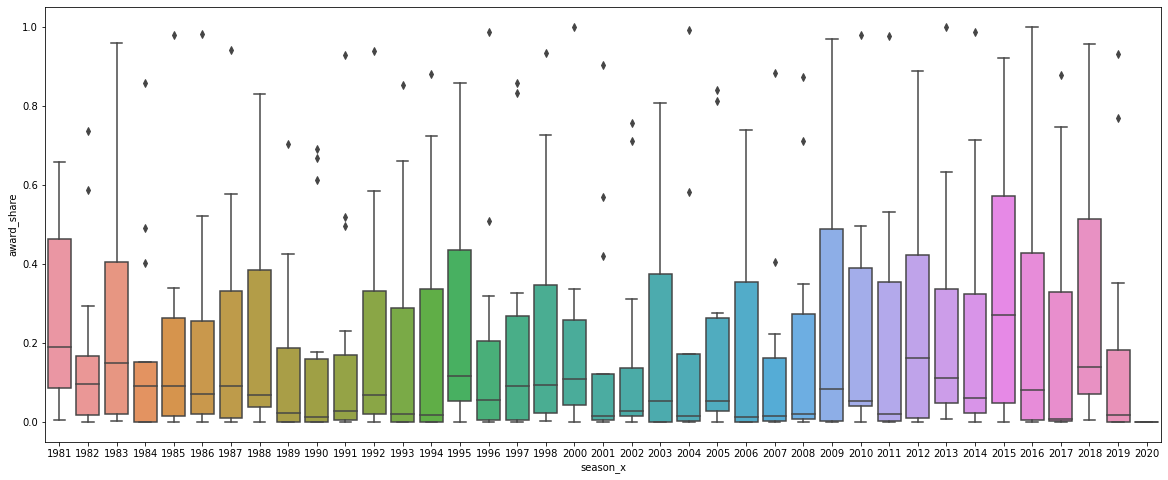

In [34]:
#draw the plot to see whether y variables change dramatically
plt.subplots(figsize=(20, 8))
sns.boxplot(x = 'season_x', y = 'award_share', data = data)
plt.show()

Regression

In [35]:
def mean_absolute_percentage_error(y_val,y_predict):
    y_val,y_predict = np.array(y_val),np.array(y_predict)
    return np.mean(np.abs((y_val - y_predict) / y_val))

In [36]:
#normalize the numericate cols
def norm_num(X_train):    
    X_train_num =pd.DataFrame(StandardScaler().fit_transform(X_train[num_col]))
    X_train_dummy = pd.DataFrame(X_train[dummy_col].to_numpy())
    X_train = pd.concat([X_train_num,X_train_dummy],axis = 1).to_numpy()
    return X_train

In [37]:
#set the params for each model
def get_Ridge_param():
    param = []
    for alpha in [1e-5,1e-4,1e-3,0.01,0.1]:
        param.append({'alpha':alpha,'random_state':221})
    return param

def get_Lasso_param():
    param = []
    for alpha in [1e-5,1e-4,1e-3,0.01,0.1]:
        param.append({'alpha':alpha,'random_state':221})
    return param

def get_ElasticNet_param():
    param = []
    for alpha in [1e-5,1e-4,1e-3,0.01,0.1]:
        for l1_ratio in [0.1,0.3,0.5,0.7,0.9]:
            param.append({'alpha':alpha,'l1_ratio':l1_ratio,'random_state':221})
    return param

def get_SVR_param():
    param = []
    for kernel in ['linear','rbf','sigmoid']:
        for C in [0.1,1,10,100,1000]:
            param.append({'kernel':kernel,'C':C})
    kernel = 'poly'
    for degree in [2,3,4,5]:
        for C in [0.1,1,10,100,1000]:
            param.append({'kernel':kernel,'degree':degree,'C':C})
    return param

def get_RandomForestRegressor_param():
    param = []
    for n_estimators in [50,100,200]:
        for criterion in ['mse','mae']:
            param.append({'n_estimators':n_estimators,'criterion':criterion,'random_state':221})
    return param

def get_GradientBoostingRegressor_param():
    param = []
    for learning_rate in [0.001,0.01,0.1,1]:
        for n_estimators in [10,100,200]:
            param.append({'learning_rate':learning_rate,'n_estimators':n_estimators,'random_state':221})
    return param

def get_AdaBoostRegressor_param():
    param = []
    for learning_rate in [0.001,0.01,0.1,1]:
        for n_estimators in [10,100,200]:
            param.append({'learning_rate':learning_rate,'n_estimators':n_estimators,'random_state':221})
    return param

def get_MLPRegressor_param():
    param = []
    for alpha in [1e-4,1e-5,1e-6]:
        for hidden_layer_sizes in [(100,),(200,),(300,)]:
            param.append({'alpha':alpha,'hidden_layer_sizes':hidden_layer_sizes,'random_state':221})
    return param


In [39]:
models = [LinearRegression,Ridge,Lasso,ElasticNet,SVR,RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,MLPRegressor]

#models = [LinearRegression,Ridge,Lasso,ElasticNet,MLPRegressor]

param = {
    LinearRegression.__name__:[{}],         
    Ridge.__name__:get_Ridge_param(),
    Lasso.__name__:get_Lasso_param(),
    ElasticNet.__name__:get_ElasticNet_param(),
    SVR.__name__:get_SVR_param(),
    RandomForestRegressor.__name__:get_RandomForestRegressor_param(),
    GradientBoostingRegressor.__name__:get_GradientBoostingRegressor_param(),
    AdaBoostRegressor.__name__:get_AdaBoostRegressor_param(),
    MLPRegressor.__name__:get_MLPRegressor_param(),
}

In [40]:
i = 0
#result for each model each param
result = pd.DataFrame(columns = ['model','param','mae_avg','mse_avg','mape_avg','mvp_avg','top3_order_avg','top3_coverage_avg','mvp_in_top3_avg','mvp_in_top5_avg'])
best_mvp_avg = 0
best_nn_mvp_avg = 0

for m in models:    
    for index,p in enumerate(param[m.__name__]):
        mae = []
        mse = []
        mape = []
        mvp = []
        top3_order = []
        top3_coverage = []
        mvp_in_top3 = []
        mvp_in_top5 = []
        for s in list(set(data['season_x'].values).difference(set([2020]))):
            #2020 didn't have target share data
            data_temp = data[data['season_x'] != 2020]
            #train_test split
            X_train = data_temp[data_temp['season_x'] != s][X_col]
            y_train = data_temp[data_temp['season_x'] != s][y_col]
            X_val = data_temp[data_temp['season_x'] == s][X_col]
            y_val = data_temp[data_temp['season_x'] == s][y_col]
            #normalize the numerical columns separately for train and validation set
            X_train = norm_num(X_train)
            X_val = norm_num(X_val)
            #predict the validation set
            model = m(**p)
            model.fit(X_train,y_train)
            y_predict = model.predict(X_val)
            #evaluation
            #mae
            mae.append(mean_absolute_error(y_val,y_predict))
            #mse
            mse.append(mean_squared_error(y_val,y_predict))
            #mape
            mape.append(mean_absolute_percentage_error(y_val,y_predict))
            #whehter correctly predict mvp
            mvp.append(np.sum(np.argmax(y_predict)== np.argmax(y_val.to_numpy())))
            #whether correctly predict first 3
            if np.sum(np.argsort(y_val.to_numpy())[::-1][:3] == np.argsort(y_predict)[::-1][:3]) == 3:
                top3_order.append(1)
            else:
                top3_order.append(0)
            #percentage of top 3 predictions are in true top 3 list
            top3_coverage.append((3 - len(set(np.argsort(y_val.to_numpy())[::-1][:3]).difference(set(np.argsort(y_predict)[::-1][:3]))))/3)
            #mvp_in_top3
            mvp_in_top3.append(np.sum(np.argsort(y_val.to_numpy())[::-1][:1] in np.argsort(y_predict)[::-1][:3]))
            #mvp_in_top5
            mvp_in_top5.append(np.sum(np.argsort(y_val.to_numpy())[::-1][:1] in np.argsort(y_predict)[::-1][:5]))
        
        #average the evaluation over all years
        mae_avg = np.mean(mae)
        mse_avg = np.mean(mse)
        mape_avg = np.mean(mape)
        mvp_avg = np.mean(mvp)
        top3_order_avg = np.mean(top3_order)
        top3_coverage_avg = np.mean(top3_coverage)
        mvp_in_top3_avg = np.mean(mvp_in_top3)
        mvp_in_top5_avg = np.mean(mvp_in_top5)
        
        #add each result to the result table
        result.loc[i] = [m.__name__,p,mae_avg,mse_avg,mape_avg,mvp_avg,top3_order_avg,top3_coverage_avg,mvp_in_top3_avg,mvp_in_top5_avg]
        i += 1
        
        #select the best model for ml and dnn
        if m.__name__ != 'MLPRegressor':
            if mvp_avg > best_mvp_avg:
                best_mvp_avg = mvp_avg
                best_model = model
                print('Current Best MVP AVG:', mvp_avg)
                print('Current Best Model:' ,model)
        else:
            if mvp_avg > best_nn_mvp_avg:
                best_nn_mvp_avg = mvp_avg
                best_nn_model = model
                print('Current Best NN MVP AVG:', mvp_avg)
                print('Current Best NN Model:' ,model)
result.to_csv('result_approach3.csv')

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

Current Best MVP AVG: 0.5789473684210527
Current Best Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

Current Best MVP AVG: 0.631578947368421
Current Best Model: Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=221, solver='auto', tol=0.001)


C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

Current Best MVP AVG: 0.6578947368421053
Current Best Model: Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=221, solver='auto', tol=0.001)


C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.114135744203538, tolerance: 0.003485662768618267
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.082479736823191, tolerance: 0.0034586796553191493
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\s

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.055885125094763, tolerance: 0.003467247037735849
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.982559901668001, tolerance: 0.0034838999543123543
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\s

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3890630793225784, tolerance: 0.0034586796553191493
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6903975671937386, tolerance: 0.0034740006124413135
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\li

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.556140280280006, tolerance: 0.003471792784976526
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9425026803251306, tolerance: 0.0034572794337264143
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.462543178090792, tolerance: 0.003485662768618267
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.40828036477445, tolerance: 0.0034586796553191493
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\si

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.31652975475881, tolerance: 0.0034838999543123543
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.62021249185505, tolerance: 0.0034820829888111897
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.442953208785368, tolerance: 0.0034

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.392481474382289, tolerance: 0.0034740006124413135
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.351542223248709, tolerance: 0.0034961408276346613
  positive)
C:\Users\Can SONG\Anaconda3\lib\

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.383978386720013, tolerance: 0.0034668852571428568
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.38721238934291, tolerance: 0.003481998507906977
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\si

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.408824255754681, tolerance: 0.0034710434504739347
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.3965324085874204, tolerance: 0.003471442571830985
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.253560779820752, tolerance: 0.0034759635766899778
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.273972917082513, tolerance: 0.00344700670071259
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\si

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.329601178121847, tolerance: 0.0034893891084905658
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.007596513682241, tolerance: 0.0034732797808962267
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.231287883762232, tolerance: 0.003523905794871795
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.310396606294635, tolerance: 0.0035087320714622637
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.153496859442205, tolerance: 0.003

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.105869984442164, tolerance: 0.003478018740235294
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.2730963979042205, tolerance: 0.003478004279205609
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\s

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.197680485240303, tolerance: 0.0034947340415094354
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.257912222908368, tolerance: 0.0034924557771226403
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.979379799913154, tolerance: 0.0034819048527315916
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.203446665605114, tolerance: 0.0034944111279999997
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.429405106751452, tolerance: 0.0034646435805225652
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.340806055841821, tolerance: 0.003485662768618267
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\s

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.60516148271279, tolerance: 0.0034820829888111897
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.552907185531048, tolerance: 0.0034668852571428568
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.422716468751165, tolerance: 0.003

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.873484689151505, tolerance: 0.003471442571830985
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.741494699589513, tolerance: 0.0034740801836065575
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.853113255755639, tolerance: 0.003

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.921643091396058, tolerance: 0.00344700670071259
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.274822696187169, tolerance: 0.003523905794871795
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.410833071228037, tolerance: 0.00350

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.440733731050658, tolerance: 0.0034877096202352953
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9880601040262245, tolerance: 0.003478018740235294
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.417894298689748, tolerance: 0.00

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.943988028301183, tolerance: 0.0034947340415094354
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.611730838189283, tolerance: 0.0034924557771226403
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2194259831642285, tolerance: 0.0034819048527315916
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9459497540710466, tolerance: 0.0034944111279999997
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\li

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3248735006576826, tolerance: 0.0035084656401891245
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8914363860961263, tolerance: 0.003477469462884161
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.451900079347273, tolerance: 0.0034838999543123543
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3744697477697017, tolerance: 0.0034820829888111897
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.593839637925078, tolerance: 0.0

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24663822537970326, tolerance: 0.0034710434504739347
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19801260271047205, tolerance: 0.003471442571830985
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\l

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05176246616129809, tolerance: 0.0034759635766899778
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13449780086294183, tolerance: 0.00344700670071259
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011909019599658066, tolerance:

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004266191806719277, tolerance: 0.003478004279205609
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01106007890492755, tolerance: 0.003473973520941177
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\l

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004607432922579591, tolerance: 0.0034961408276346613
  positive)
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divi

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

Current Best NN MVP AVG: 0.5789473684210527
Current Best NN Model: MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=221, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)


C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

Current Best NN MVP AVG: 0.631578947368421
Current Best NN Model: MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(300,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=221, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)


C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the

In [41]:
result

,model,param,mae_avg,mse_avg,mape_avg,mvp_avg,top3_order_avg,top3_coverage_avg,mvp_in_top3_avg,mvp_in_top5_avg
0,LinearRegression,{},0.189026,0.058871,inf,0.578947,0.026316,0.596491,0.894737,0.921053
1,Ridge,"{'alpha': 1e-05, 'random_state': 221}",0.188997,0.058842,inf,0.578947,0.026316,0.596491,0.894737,0.921053
2,Ridge,"{'alpha': 0.0001, 'random_state': 221}",0.188778,0.058636,inf,0.578947,0.026316,0.596491,0.894737,0.921053
3,Ridge,"{'alpha': 0.001, 'random_state': 221}",0.187810,0.057850,inf,0.631579,0.026316,0.605263,0.894737,0.921053
4,Ridge,"{'alpha': 0.01, 'random_state': 221}",0.184829,0.056091,inf,0.657895,0.052632,0.614035,0.894737,0.921053
5,Ridge,"{'alpha': 0.1, 'random_state': 221}",0.178698,0.052926,inf,0.605263,0.026316,0.622807,0.894737,0.921053
6,Lasso,"{'alpha': 1e-05, 'random_state': 221}",0.178135,0.052842,inf,0.605263,0.052632,0.631579,0.894737,0.921053
7,Lasso,"{'alpha': 0.0001, 'random_state': 221}",0.173405,0.050493,inf,0.605263,0.052632,0.622807,0.894737,0.921053
8,Lasso,"{'alpha': 0.001, 'random_state': 221}",0.158681,0.044058,inf,0.631579,0.078947,0.684211,0.921053,0.921053
9,Lasso,"{'alpha': 0.01, 'random_state': 221}",0.152264,0.043266,inf,0.526316,0.052632,0.692982,0.894737,0.921053


In [42]:
best_model

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=221, solver='auto', tol=0.001)

In [43]:
best_nn_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(300,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=221, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Compare the best model result for each year

In [44]:
#print the prediction for each year of best_model
result_compare = pd.DataFrame(index = data.index,columns = ['season','player','true','true_rank','pred','pred_rank'])
for s in list(set(data['season_x'].values).difference(set([2020]))):
    #2020 didn't have target share data
    data_temp = data[data['season_x'] != 2020]
    #train_test split
    X_train = data_temp[data_temp['season_x'] != s][X_col]
    y_train = data_temp[data_temp['season_x'] != s][y_col]
    X_val = data_temp[data_temp['season_x'] == s][X_col]
    y_val = data_temp[data_temp['season_x'] == s][y_col]
    #normalize the numerical columns separately for train and validation set
    X_train = norm_num(X_train)
    X_val = norm_num(X_val)
    #predict the validation set
    model = best_model
    model.fit(X_train,y_train)
    y_predict = model.predict(X_val)
    result_compare['player'].loc[y_val.index] = data_temp[data_temp['season_x'] == s]['player']
    result_compare['season'].loc[y_val.index] = data_temp[data_temp['season_x'] == s]['season_x']
    result_compare['true'].loc[y_val.index] = y_val
    result_compare['true_rank'].loc[y_val.index] = y_val.rank(method = 'dense',ascending = False)
    result_compare['pred'].loc[y_val.index] = y_predict
    result_compare['pred_rank'].loc[y_val.index] = pd.Series(y_predict,index = y_val.index).rank(method = 'dense',ascending = False)

In [45]:
result_compare.to_csv('result_compare_approach3.csv')

In [46]:
#print the prediction for each year of best_model
result_compare = pd.DataFrame(index = data.index,columns = ['season','player','true','true_rank','pred','pred_rank'])
for s in list(set(data['season_x'].values).difference(set([2020]))):
    #2020 didn't have target share data
    data_temp = data[data['season_x'] != 2020]
    #train_test split
    X_train = data_temp[data_temp['season_x'] != s][X_col]
    y_train = data_temp[data_temp['season_x'] != s][y_col]
    X_val = data_temp[data_temp['season_x'] == s][X_col]
    y_val = data_temp[data_temp['season_x'] == s][y_col]
    #normalize the numerical columns separately for train and validation set
    X_train = norm_num(X_train)
    X_val = norm_num(X_val)
    #predict the validation set
    model = best_nn_model
    model.fit(X_train,y_train)
    y_predict = model.predict(X_val)
    result_compare['player'].loc[y_val.index] = data_temp[data_temp['season_x'] == s]['player']
    result_compare['season'].loc[y_val.index] = data_temp[data_temp['season_x'] == s]['season_x']
    result_compare['true'].loc[y_val.index] = y_val
    result_compare['true_rank'].loc[y_val.index] = y_val.rank(method = 'dense',ascending = False)
    result_compare['pred'].loc[y_val.index] = y_predict
    result_compare['pred_rank'].loc[y_val.index] = pd.Series(y_predict,index = y_val.index).rank(method = 'dense',ascending = False)

In [47]:
result_compare.to_csv('result_compare_nn_approach3.csv')

predict 2020

In [48]:
data_temp = data[data['season_x'] != 2020]
X_train = data_temp[X_col]
y_train = data_temp[y_col]
X_val = data[data['season_x'] == 2020][X_col]
X_train = norm_num(X_train)
X_val = norm_num(X_val)
#use best model to predict 2020
model = best_model
model.fit(X_train,y_train)
y_predict = model.predict(X_val)

predict_share = pd.DataFrame(data = y_predict,columns = ['predict_share'],index = data[data['season_x'] == 2020]['player'].to_list())
predict_share = predict_share.sort_values('predict_share',ascending= False)

In [49]:
predict_share.to_csv('namelist_approach3.csv')

In [51]:
data_temp = data[data['season_x'] != 2020]
X_train = data_temp[X_col]
y_train = data_temp[y_col]
X_val = data[data['season_x'] == 2020][X_col]
X_train = norm_num(X_train)
X_val = norm_num(X_val)
#use best model to predict 2020
model = best_nn_model
model.fit(X_train,y_train)
y_predict = model.predict(X_val)

predict_share = pd.DataFrame(data = y_predict,columns = ['predict_share'],index = data[data['season_x'] == 2020]['player'].to_list())
predict_share = predict_share.sort_values('predict_share',ascending= False)

C:\Users\Can SONG\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [53]:
predict_share.to_csv('namelist_nn_approach3.csv')